In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

from subprocess import check_output

In [2]:
df_train = pd.read_csv("dataset regionall.csv")
df_train.head()

,Daerah,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
0,Kab. Lebak,Banten,340,53680341,2015,126.42,9.97,1268.004012,62.030000,4436.20,6.20
1,Kab. Pandeglang,Banten,326,51469974,2015,124.42,10.43,1192.905081,62.720000,5067.20,5.81
2,Kab. Serang,Banten,326,51469974,2015,74.85,5.09,1470.530452,64.610000,3954.27,5.09
3,Kab. Tangerang,Banten,246,38839306,2015,191.12,5.71,3347.110333,70.050000,4784.90,5.60
4,Kab. Bandung,Jawa Barat,270,54265335,2015,281.04,8.00,3513.000000,70.048031,4863.23,5.89


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 11 columns):
Daerah         340 non-null object
provinsi       340 non-null object
sumDesa        340 non-null int64
danadesa       340 non-null int64
tahun          340 non-null int64
miskin         340 non-null float64
miskin_perc    340 non-null float64
populasi       340 non-null float64
ipm            255 non-null float64
pdrb_tani      255 non-null float64
pdrb_growth    255 non-null float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.3+ KB


In [4]:
data = df_train.drop([84,169,254,339])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 338
Data columns (total 11 columns):
Daerah         336 non-null object
provinsi       336 non-null object
sumDesa        336 non-null int64
danadesa       336 non-null int64
tahun          336 non-null int64
miskin         336 non-null float64
miskin_perc    336 non-null float64
populasi       336 non-null float64
ipm            252 non-null float64
pdrb_tani      252 non-null float64
pdrb_growth    252 non-null float64
dtypes: float64(6), int64(3), object(2)
memory usage: 31.5+ KB


In [5]:
data.describe()

,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
count,336.000000,3.360000e+02,336.000000,336.000000,336.000000,336.000000,252.000000,252.000000,252.000000
mean,261.660714,1.671561e+08,2016.500000,151.663661,12.231875,1325.071555,68.318097,4657.302817,5.418651
std,97.395567,1.308894e+08,1.119701,75.211058,4.116944,814.398000,3.920843,2567.924541,1.978051
min,16.000000,1.000000e+00,2015.000000,7.980000,3.890000,181.106613,58.180000,331.330000,0.080000
25%,197.500000,6.375675e+07,2015.750000,99.060000,9.655000,868.980686,65.520000,3062.472500,5.037500
50%,266.000000,1.676770e+08,2016.500000,136.370000,11.690000,1150.138658,68.115000,3936.815000,5.295000
75%,327.000000,2.302680e+08,2017.250000,191.402500,14.382500,1553.576661,70.447500,5794.902500,5.712500
max,469.000000,1.745276e+09,2018.000000,490.800000,25.690000,5812.605000,82.850000,15612.160000,23.530000


In [6]:
data1 = data.loc[data["tahun"] != 2018]
data1 = data1.set_index("Daerah")
data1.head()

,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
Daerah,,,,,,,,,,
Kab. Lebak,Banten,340,53680341,2015,126.42,9.97,1268.004012,62.030000,4436.20,6.20
Kab. Pandeglang,Banten,326,51469974,2015,124.42,10.43,1192.905081,62.720000,5067.20,5.81
Kab. Serang,Banten,326,51469974,2015,74.85,5.09,1470.530452,64.610000,3954.27,5.09
Kab. Tangerang,Banten,246,38839306,2015,191.12,5.71,3347.110333,70.050000,4784.90,5.60
Kab. Bandung,Jawa Barat,270,54265335,2015,281.04,8.00,3513.000000,70.048031,4863.23,5.89


In [7]:
data1.describe()

,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
count,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,261.662698,1.482487e+08,2016.000000,156.188135,12.621825,1319.010688,68.318097,4657.302817,5.418651
std,97.447224,1.382599e+08,0.818121,77.482281,4.160253,805.386273,3.920843,2567.924541,1.978051
min,16.000000,1.000000e+00,2015.000000,8.770000,4.310000,181.106613,58.180000,331.330000,0.080000
25%,197.500000,4.996784e+07,2015.000000,102.930000,9.992500,865.820734,65.520000,3062.472500,5.037500
50%,266.000000,1.440039e+08,2016.000000,141.000000,12.230000,1147.536742,68.115000,3936.815000,5.295000
75%,327.000000,2.128129e+08,2017.000000,196.222500,14.542500,1546.318809,70.447500,5794.902500,5.712500
max,469.000000,1.745276e+09,2017.000000,490.800000,25.690000,5685.880980,82.850000,15612.160000,23.530000


In [8]:
t2018 = data.loc[data["tahun"]==2018]
t2018.tail()

,Daerah,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
334,Kota Batu,Jawa Timur,19,21641636,2018,7.98,3.89,205.141,NaN,NaN,NaN
335,Kab. Bantul,DIY,75,81576312,2018,134.84,13.43,1004.021,NaN,NaN,NaN
336,Kab. Gunung Kidul,DIY,144,118761945,2018,125.76,17.12,734.579,NaN,NaN,NaN
337,Kab. Kulon Progo,DIY,87,77889191,2018,77.72,18.30,424.699,NaN,NaN,NaN
338,Kab. Sleman,DIY,86,83666949,2018,92.04,7.65,1203.137,NaN,NaN,NaN


In [9]:
t2017 = data.loc[data["tahun"]==2017]
t2017.tail()

,Daerah,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
249,Kota Batu,Jawa Timur,19,18852611,2017,8.77,4.31,203.480278,74.26,1469.64,6.56
250,Kab. Bantul,DIY,75,77730491,2017,139.67,14.07,992.679460,78.67,2032.34,5.10
251,Kab. Gunung Kidul,DIY,144,132353781,2017,135.74,18.65,727.828418,68.73,2664.85,5.00
252,Kab. Kulon Progo,DIY,87,77627477,2017,84.17,20.03,420.219671,73.23,1178.49,5.97
253,Kab. Sleman,DIY,86,80855810,2017,96.75,8.13,1190.036900,82.85,2047.96,5.35


In [10]:
t2016 = data.loc[data["tahun"]==2016]
t2016.tail()

,Daerah,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
164,Kota Batu,Jawa Timur,19,14572714,2016,9.05,4.48,202.008929,73.57,1436.88,6.61
165,Kab. Bantul,DIY,75,60601265,2016,142.76,14.55,981.168385,78.42,1982.71,5.06
166,Kab. Gunung Kidul,DIY,144,103567918,2016,139.15,19.34,719.493278,67.82,2613.14,4.89
167,Kab. Kulon Progo,DIY,87,60511729,2016,84.34,20.30,415.467980,72.38,1158.71,4.76
168,Kab. Sleman,DIY,86,63014717,2016,96.63,8.21,1176.979294,82.15,2025.85,5.25


In [11]:
t2015 = data.loc[data["tahun"]==2015]
t2015.tail()

,Daerah,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
79,Kota Batu,Jawa Timur,19,2856833,2015,9.43,4.71,200.212314,72.62,1370.26,6.69
80,Kab. Bantul,DIY,75,21559226,2015,160.15,16.33,980.710349,77.99,1952.98,4.97
81,Kab. Gunung Kidul,DIY,144,41393714,2015,155.00,21.73,713.299586,67.41,2557.40,4.82
82,Kab. Kulon Progo,DIY,87,2500802,2015,88.13,21.40,411.822430,71.52,1138.92,4.62
83,Kab. Sleman,DIY,86,24721246,2015,110.96,9.46,1172.938689,81.20,2003.47,5.18


In [12]:
t2018.describe()

,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
count,84.000000,8.400000e+01,84.0,84.000000,84.000000,84.000000,0.0,0.0,0.0
mean,261.654762,2.238780e+08,2018.0,138.090238,11.062024,1343.254155,NaN,NaN,NaN
std,97.825083,8.365258e+07,0.0,66.539371,3.771295,845.536381,NaN,NaN,NaN
min,16.000000,1.773252e+07,2018.0,7.980000,3.890000,182.632000,NaN,NaN,NaN
25%,197.500000,1.671173e+08,2018.0,89.612500,8.337500,875.479500,NaN,NaN,NaN
50%,266.000000,2.266994e+08,2018.0,125.755000,10.335000,1158.253500,NaN,NaN,NaN
75%,327.000000,2.805876e+08,2018.0,173.607500,13.130000,1568.982000,NaN,NaN,NaN
max,469.000000,4.029849e+08,2018.0,415.020000,21.210000,5812.605000,NaN,NaN,NaN


In [13]:
t2017.describe()

,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
count,84.000000,8.400000e+01,84.0,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,261.654762,2.153417e+08,2017.0,153.164524,12.287381,1331.158603,68.918929,4773.469762,5.290595
std,97.825083,8.173081e+07,0.0,76.511947,4.055681,826.616264,3.884871,2646.290085,1.005769
min,16.000000,2.144700e+05,2017.0,8.770000,4.310000,182.294618,59.900000,346.290000,1.450000
25%,197.500000,1.644107e+08,2017.0,99.017500,9.875000,869.519701,66.310000,3129.447500,5.067500
50%,266.000000,2.146562e+08,2017.0,138.155000,11.725000,1152.976589,68.800000,3994.090000,5.275000
75%,327.000000,2.711158e+08,2017.0,191.215000,14.090000,1558.413223,70.812500,5936.187500,5.725000
max,469.000000,3.634235e+08,2017.0,487.280000,23.560000,5685.880980,82.850000,15612.160000,10.260000


In [14]:
t2016.describe()

,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
count,84.000000,8.400000e+01,84.0,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,261.666667,1.876316e+08,2016.0,155.16500,12.541786,1319.078057,68.313929,4679.683214,5.637976
std,97.844151,1.822085e+08,0.0,77.39558,4.134481,808.497753,3.906839,2590.258124,2.861343
min,16.000000,1.264106e+07,2016.0,9.05000,4.480000,181.740371,59.090000,343.360000,0.080000
25%,197.500000,1.296492e+08,2016.0,101.62500,10.022500,866.939202,65.662500,3043.930000,5.057500
50%,266.000000,1.683221e+08,2016.0,141.38500,11.920000,1147.536742,68.210000,3903.690000,5.330000
75%,327.000000,2.105559e+08,2016.0,196.06500,14.482500,1544.388127,70.365000,5860.430000,5.702500
max,469.000000,1.745276e+09,2016.0,490.80000,24.110000,5558.323896,82.150000,15378.280000,23.530000


In [15]:
t2015.describe()

,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
count,84.000000,8.400000e+01,84.0,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,261.666667,4.177280e+07,2015.0,160.234881,13.036310,1306.795403,67.721433,4518.755476,5.327381
std,97.844151,1.813997e+07,0.0,79.272538,4.301642,790.131486,3.925327,2489.121800,1.599930
min,16.000000,1.000000e+00,2015.0,9.430000,4.710000,181.106613,58.180000,331.330000,1.270000
25%,197.500000,3.078613e+07,2015.0,106.040000,10.300000,861.005542,64.877047,2950.715000,4.965000
50%,266.000000,3.874086e+07,2015.0,146.460000,12.500000,1141.385154,67.712253,3840.785000,5.275000
75%,327.000000,5.202000e+07,2015.0,200.957500,14.965000,1530.166954,69.892500,5585.405000,5.612500
max,469.000000,8.461373e+07,2015.0,487.100000,25.690000,5436.383929,81.200000,14958.590000,17.420000


In [16]:
data1["log_miskin"] = np.log(data1["miskin"])
data1["log_pdrbtani"] = np.log(data1["pdrb_tani"])
data1["log_ipm"] = np.log(data1["ipm"])
data1["log_dd"] = np.log(data1["danadesa"])


In [17]:
data1["log_ddperdesa"] = np.log(data1["danadesa"]/ data1["populasi"])
data1["log_growth"] = np.log(data["pdrb_growth"])

In [18]:
data1.head()

,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_ddperdesa,log_growth
Daerah,,,,,,,,,,,,,,,,
Kab. Lebak,Banten,340,53680341,2015,126.42,9.97,1268.004012,62.030000,4436.20,6.20,4.839610,8.397553,4.127618,17.798557,10.653358,NaN
Kab. Pandeglang,Banten,326,51469974,2015,124.42,10.43,1192.905081,62.720000,5067.20,5.81,4.823663,8.530544,4.138680,17.756509,10.672362,NaN
Kab. Serang,Banten,326,51469974,2015,74.85,5.09,1470.530452,64.610000,3954.27,5.09,4.315486,8.282551,4.168369,17.756509,10.463131,NaN
Kab. Tangerang,Banten,246,38839306,2015,191.12,5.71,3347.110333,70.050000,4784.90,5.60,5.252902,8.473220,4.249209,17.474943,9.359091,NaN
Kab. Bandung,Jawa Barat,270,54265335,2015,281.04,8.00,3513.000000,70.048031,4863.23,5.89,5.638497,8.489458,4.249181,17.809396,9.645171,NaN


In [19]:
data2 = data1[["pdrb_growth","log_miskin","log_pdrbtani","log_ipm","log_dd"]]

In [20]:
data1.to_csv("dataku.csv")

In [21]:
data3 = data1[["pdrb_growth","log_miskin","log_pdrbtani","log_ipm","log_dd"]]

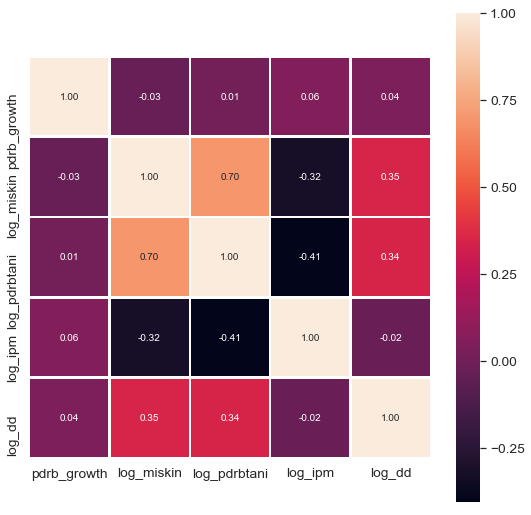

In [22]:
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.25)
sns.heatmap(data3.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                
            )
plt.show()

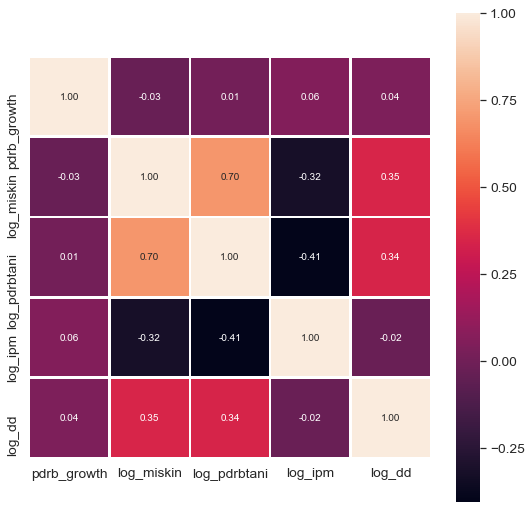

In [23]:
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.25)
sns.heatmap(data2.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                
            )
plt.show()

In [24]:
data2 = data1[['danadesa','log_ipm', "log_pdrbtani", "log_miskin", "provinsi", "tahun"]]
data2.head()

,danadesa,log_ipm,log_pdrbtani,log_miskin,provinsi,tahun
Daerah,,,,,,
Kab. Lebak,53680341,4.127618,8.397553,4.839610,Banten,2015
Kab. Pandeglang,51469974,4.138680,8.530544,4.823663,Banten,2015
Kab. Serang,51469974,4.168369,8.282551,4.315486,Banten,2015
Kab. Tangerang,38839306,4.249209,8.473220,5.252902,Banten,2015
Kab. Bandung,54265335,4.249181,8.489458,5.638497,Jawa Barat,2015


In [25]:
data3.tail()

,pdrb_growth,log_miskin,log_pdrbtani,log_ipm,log_dd
Daerah,,,,,
Kota Batu,6.56,2.171337,7.292773,4.307572,16.752162
Kab. Bantul,5.10,4.939282,7.616943,4.365262,18.168758
Kab. Gunung Kidul,5.00,4.910741,7.887903,4.230186,18.700989
Kab. Kulon Progo,5.97,4.432839,7.071989,4.293605,18.167432
Kab. Sleman,5.35,4.572130,7.624599,4.417032,18.208178


plt.figure(figsize=(11, 11))
sns.pairplot(data2, kind="reg", diag_kind="kde")
plt.show()

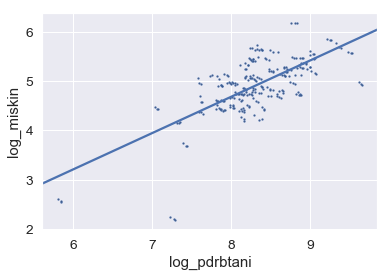

In [26]:
sns.regplot(data3.log_pdrbtani, data3.log_miskin, order=1, ci=None, scatter_kws={'color':'black','edgecolors':'b', 's':2})


In [27]:
import statsmodels.formula.api as smf

In [28]:
data1["log_growth"] = np.log(data1["pdrb_growth"])

In [29]:
data1["log_populasi"] = np.log(data1["populasi"])

In [30]:
data1["log_populasiperdesa"] = np.log(data1["populasi"]/ data1["sumDesa"])

In [31]:
data1.head()

,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth,log_miskin,log_pdrbtani,log_ipm,log_dd,log_ddperdesa,log_growth,log_populasi,log_populasiperdesa
Daerah,,,,,,,,,,,,,,,,,,
Kab. Lebak,Banten,340,53680341,2015,126.42,9.97,1268.004012,62.030000,4436.20,6.20,4.839610,8.397553,4.127618,17.798557,10.653358,1.824549,7.145199,1.316254
Kab. Pandeglang,Banten,326,51469974,2015,124.42,10.43,1192.905081,62.720000,5067.20,5.81,4.823663,8.530544,4.138680,17.756509,10.672362,1.759581,7.084147,1.297249
Kab. Serang,Banten,326,51469974,2015,74.85,5.09,1470.530452,64.610000,3954.27,5.09,4.315486,8.282551,4.168369,17.756509,10.463131,1.627278,7.293378,1.506481
Kab. Tangerang,Banten,246,38839306,2015,191.12,5.71,3347.110333,70.050000,4784.90,5.60,5.252902,8.473220,4.249209,17.474943,9.359091,1.722767,8.115853,2.610521
Kab. Bandung,Jawa Barat,270,54265335,2015,281.04,8.00,3513.000000,70.048031,4863.23,5.89,5.638497,8.489458,4.249181,17.809396,9.645171,1.773256,8.164226,2.565804


In [32]:
est = smf.ols('log_miskin ~ log_pdrbtani + log_dd + log_populasiperdesa + log_ipm + pdrb_growth', data1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_miskin   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     53.82
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           1.32e-37
Time:                        14:37:07   Log-Likelihood:                -131.91
No. Observations:                 252   AIC:                             275.8
Df Residuals:                     246   BIC:                             297.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.8953      2.391      1.211      0.227      -1.814       7.605
log_pdrbtani            0.6522      0.055     11.837      0.000       0.544       0.761
log_dd                  0.0564      0.018      3.087      0.002       0.020       0.092
log_populasiperdesa     0.1826      0.058      3.139      0.002       0.068       0.297
log_ipm                -1.1103      0.529     -2.099      0.037      -2.152      -0.068
pdrb_growth            -0.0067      0.013     -0.508      0.612      -0.033       0.019
==============================================================================
Omnibus:                       80.593   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.053
Skew:                          -1.282   Prob(JB):                     2.86e-68
Kurtosis:                       7.801   Cond. No.                     2.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
data4 = data1[["log_miskin", "log_dd", "log_pdrbtani", "log_ipm", "pdrb_growth", "provinsi"]]

In [34]:
data5 = data1[["miskin", "danadesa", "pdrb_tani", "ipm", "pdrb_growth"]]
data5.describe()

,miskin,danadesa,pdrb_tani,ipm,pdrb_growth
count,252.000000,2.520000e+02,252.000000,252.000000,252.000000
mean,156.188135,1.482487e+08,4657.302817,68.318097,5.418651
std,77.482281,1.382599e+08,2567.924541,3.920843,1.978051
min,8.770000,1.000000e+00,331.330000,58.180000,0.080000
25%,102.930000,4.996784e+07,3062.472500,65.520000,5.037500
50%,141.000000,1.440039e+08,3936.815000,68.115000,5.295000
75%,196.222500,2.128129e+08,5794.902500,70.447500,5.712500
max,490.800000,1.745276e+09,15612.160000,82.850000,23.530000


<Figure size 792x792 with 0 Axes>

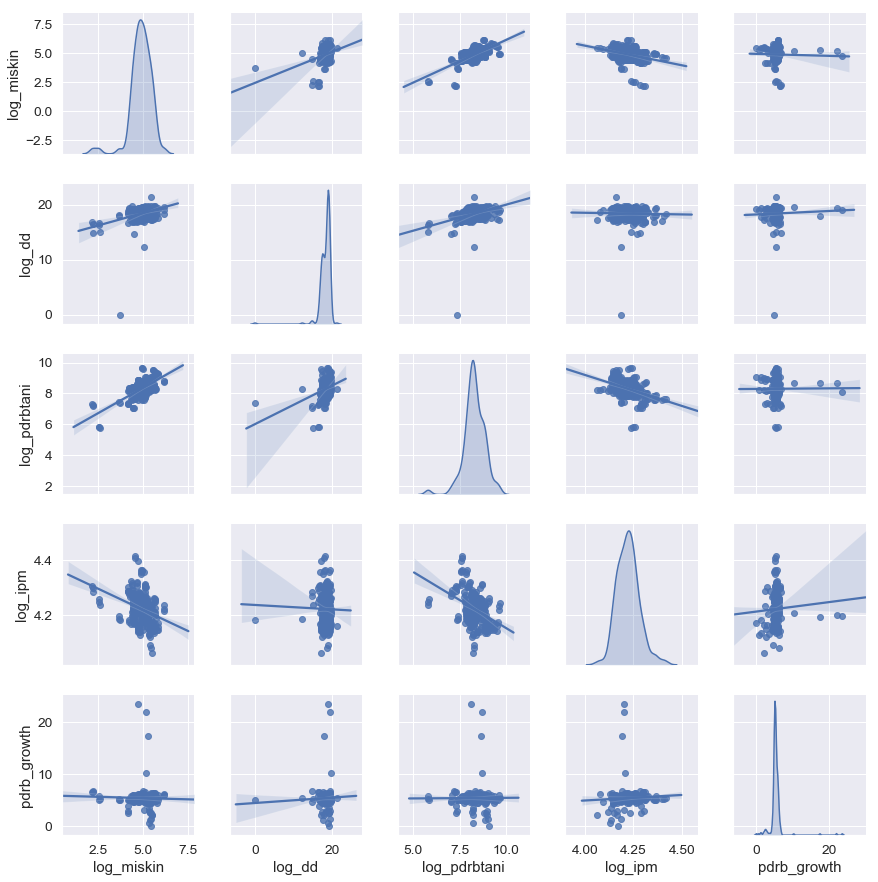

In [35]:
plt.figure(figsize=(11, 11))
sns.pairplot(data4, kind="reg", diag_kind="kde")
plt.show()

<Figure size 1080x1080 with 0 Axes>

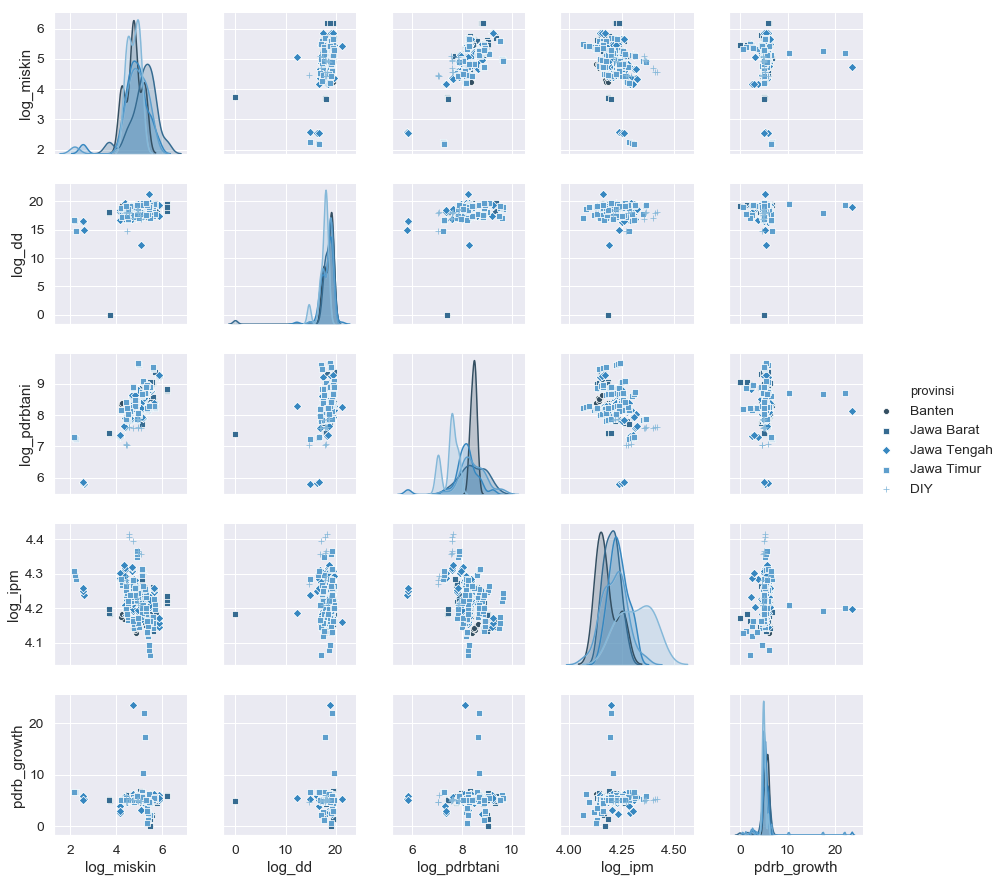

In [39]:
plt.figure(figsize=(15, 15))
sns.pairplot(data4, hue="provinsi", palette=("Blues_d"), markers=["o", "s", "D", ",", "+"])
plt.savefig('edit.png')
plt.show()

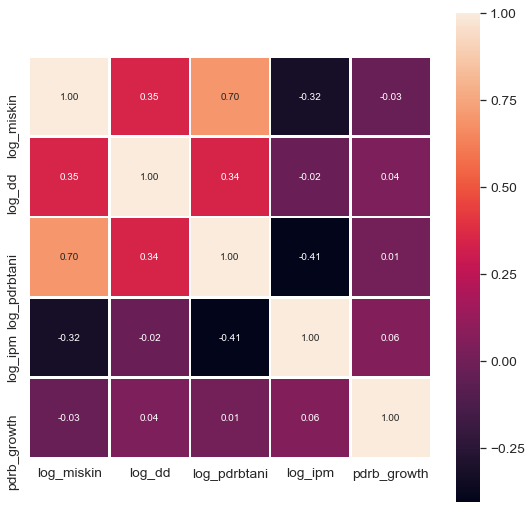

In [37]:
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.25)
sns.heatmap(data4.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                
            )
plt.show()